<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826161 sha256=248dc1445b24c2889cd146233893bd8233925222a081be231bd1cbaa127c6351
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436506 sha256=5afa553ef1717c72f2561deac39c43525325ec1d486b578d0497c6492913ef77
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [136]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-btc", interval="minute15", count=300)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                           open        high         low       close  \
2023-04-04 06:00:00  36719000.0  36721000.0  36378000.0  36520000.0   
2023-04-04 06:15:00  36520000.0  36710000.0  36473000.0  36631000.0   
2023-04-04 06:30:00  36631000.0  36753000.0  36630000.0  36700000.0   
2023-04-04 06:45:00  36717000.0  36925000.0  36688000.0  36904000.0   
2023-04-04 07:00:00  36904000.0  36963000.0  36840000.0  36955000.0   
...                         ...         ...         ...         ...   
2023-04-07 07:45:00  37069000.0  37069000.0  37042000.0  37062000.0   
2023-04-07 08:00:00  37062000.0  37112000.0  37046000.0  37099000.0   
2023-04-07 08:15:00  37099000.0  37099000.0  37065000.0  37083000.0   
2023-04-07 08:30:00  37087000.0  37099000.0  37065000.0  37083000.0   
2023-04-07 08:45:00  37083000.0  37084000.0  37060000.0  37073000.0   

                         volume         value  
2023-04-04 06:00:00  267.943339  9.781387e+09  
2023-04-04 06:15:00   88.889055  3.256073e+09  
202

In [137]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-04 06:00:00,36520000.0
1,2023-04-04 06:15:00,36631000.0
2,2023-04-04 06:30:00,36700000.0
3,2023-04-04 06:45:00,36904000.0
4,2023-04-04 07:00:00,36955000.0
...,...,...
295,2023-04-07 07:45:00,37062000.0
296,2023-04-07 08:00:00,37099000.0
297,2023-04-07 08:15:00,37083000.0
298,2023-04-07 08:30:00,37083000.0


In [138]:
#prophet 불러옴
from fbprophet import Prophet

In [139]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [140]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=15, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


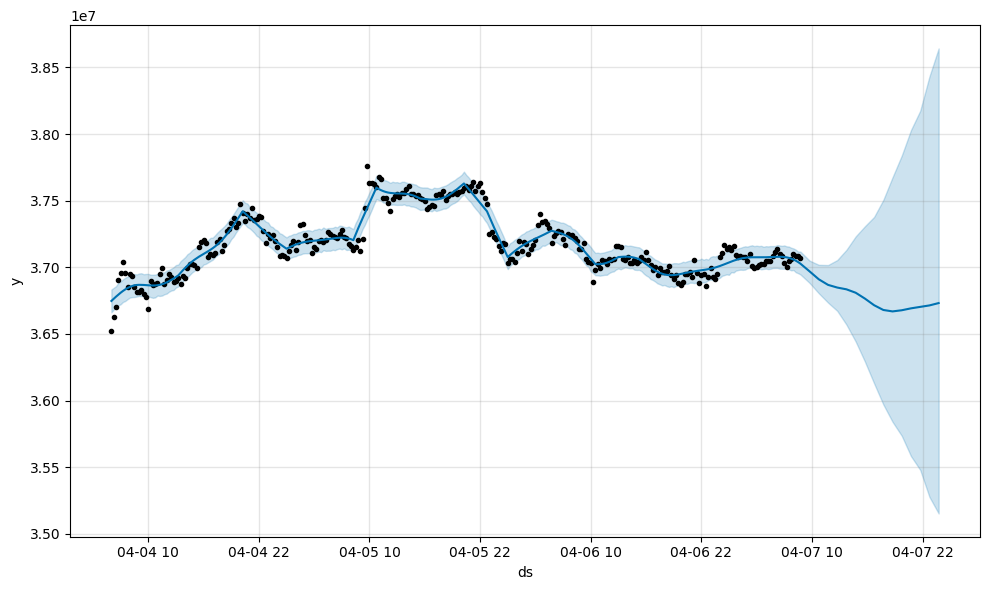

In [141]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


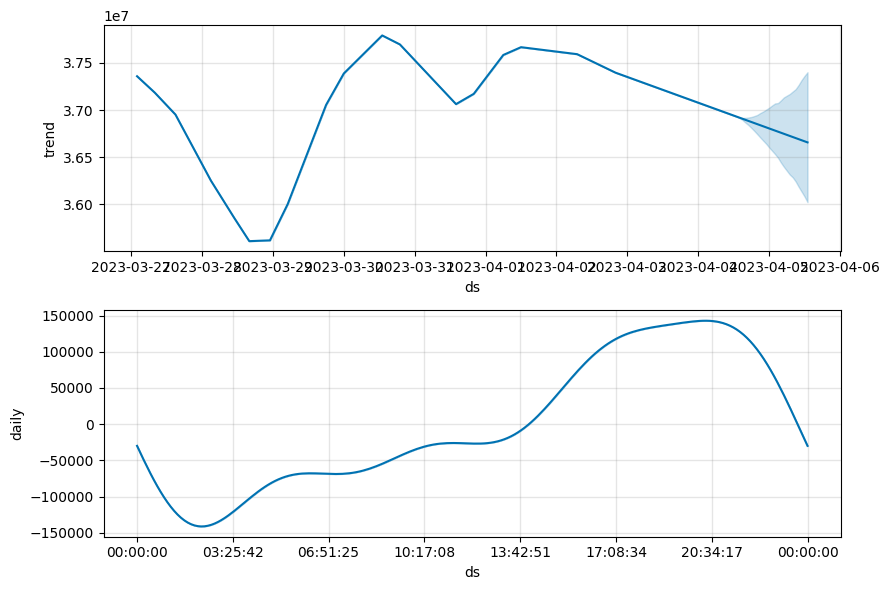

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)